<a href="https://colab.research.google.com/github/naveenudhay/clothingclassfication/blob/convolutedneuralnetwork/Clothing_Classfication_using_MNIST_dataset_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Import packages

In [1]:
import tensorflow as tf
import numpy as ny
from tensorflow import keras
import matplotlib.pyplot as plt

Load Fashion MNIST through tf API call

In [2]:
ds = tf.keras.datasets.fashion_mnist
(training_images, training_data),(test_images,test_data) = ds.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print('Training Data size: {}'.format(len(training_images)))
print('Test Data size: {}'.format(len(test_images)))

Training Data size: 60000
Test Data size: 10000


In [4]:
class_names = ['Tshirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

Reshape for color depth

In [5]:
training_images = training_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)

Normalize data

In [6]:
test_images = test_images/255.0
training_images = training_images /255.0

Build CNN model

In [14]:
mod = tf.keras.models.Sequential([keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(28,28,1)),
                                  keras.layers.MaxPooling2D((2,2),strides=2),
                                  keras.layers.Flatten(),
                                  keras.layers.Dense(256, activation='relu'),
                                  keras.layers.Dense(10, activation='softmax')])

mod.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Model Summary

In [15]:
mod.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               3211520   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 3,214,730
Trainable params: 3,214,730
Non-trainable params: 0
_________________________________________________________________


Train model

In [16]:
mod.fit(training_images,training_data,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3625 - accuracy: 0.8705
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2411 - accuracy: 0.9108
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1933 - accuracy: 0.9284
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1585 - accuracy: 0.9401
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1296 - accuracy: 0.9518


Evaluate the model

In [17]:
mod.evaluate(test_images,test_data)

313/313 [==============================] - 1s 3ms/step - loss: 0.2451 - accuracy: 0.9156


[0.24508245289325714, 0.9156000018119812]

Make predictions

In [18]:
test_index = 1199
test_img = test_images[test_index]
prediction_results = mod.predict(ny.array([test_img]))
print(prediction_results.shape)
print(prediction_results[0])

predicted_index = ny.argmax(prediction_results[0])

print('Predicted index: '+str(predicted_index))
print('Predicted class: '+class_names[predicted_index])

(1, 10)
[4.1718963e-08 1.5960143e-08 3.3872116e-10 5.4300617e-09 6.2659575e-09
 6.0152587e-08 3.5276679e-07 3.9869014e-11 9.9999952e-01 2.0343098e-12]
Predicted index: 8
Predicted class: Bag


Actual result

Actual class: Bag


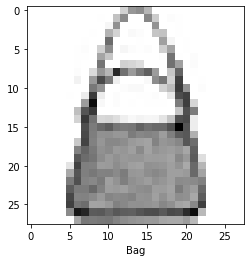

In [19]:
actual_class = test_data[test_index]
print('Actual class: '+class_names[actual_class])
plt.figure()
plt.imshow(test_img.squeeze(),cmap=plt.cm.binary)
plt.xlabel(class_names[actual_class])
plt.show()
